# Importing Libraries

In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re

# Loading data

In [2]:
data = pd.read_csv(r"C:\Users\kondu\Desktop\255-Team-13\Data\spamSMS.csv")
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data visualization

In [3]:
data.shape

(5574, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [6]:
# Get all the ham and spam emails
ham_message = data[data.Class =='ham']
spam_message = data[data.Class=='spam']

In [7]:
ham_message

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5567,ham,Huh y lei...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [8]:
spam_message

,Class,input Text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,Had your contract mobile 11 Mnths? Latest Moto...
5568,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [9]:
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_message["input Text"].to_numpy().tolist())
spam_msg_text = " ".join(spam_message["input Text"].to_numpy().tolist())

In [10]:
ham_msg_text 

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that¬ís the way u feel. That¬ís the wa

In [11]:
spam_msg_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, ¬£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea ¬£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our ¬£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

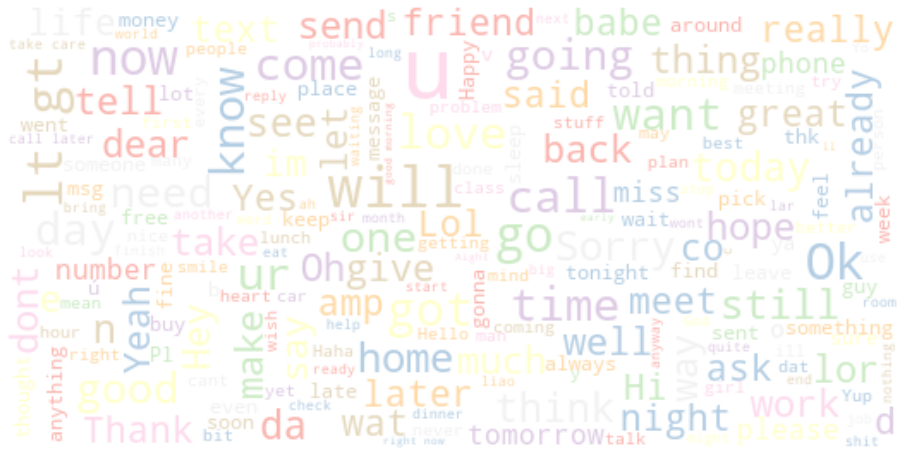

In [12]:
# wordcloud of ham messages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
ham_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white", colormap='Pastel1').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

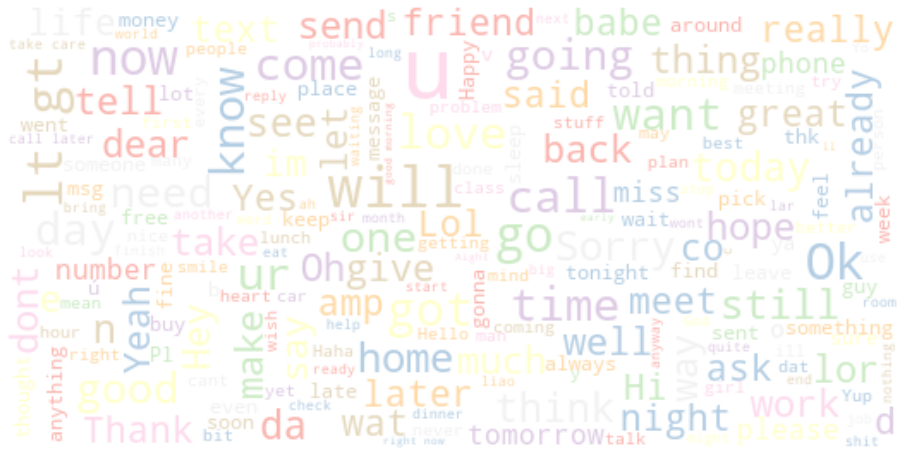

In [13]:
# wordcloud of spam messages
spam_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white", colormap='Pastel1').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Count')

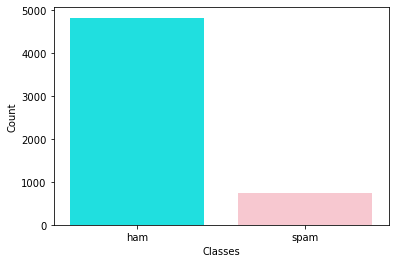

In [14]:
#Checking if the data is imbalanced or not
cols= ["#00FFFF", "#FFC0CB"] #colour palette
bar = sns.countplot(x= data["Class"], palette= cols)
bar.set_xlabel("Classes")
bar.set_ylabel("Count")

Hence, The data imbalance is quite evident here.

**Sampling**

In [15]:
# one way to fix it is to downsample the ham msg
ham_df = ham_message.sample(n = len(spam_message), random_state = 44)
spam_df = spam_message
print(ham_df.shape, spam_df.shape)

(747, 2) (747, 2)


C:\Users\kondu\AppData\Local\Temp\ipykernel_5148\3314693874.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_df.append(spam_df).reset_index(drop=True)


Text(0, 0.5, 'Count')

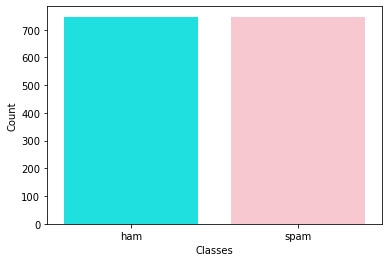

In [16]:
# Create a dataframe with these ham and spam msg
msg_df = ham_df.append(spam_df).reset_index(drop=True)
bar1 = sns.countplot(x= msg_df["Class"], palette= cols)
bar1.set_xlabel("Classes")
bar1.set_ylabel("Count")

**FEATURE ENGINEERING**

**To explore and get to know data better I am creating more features(columns)**
- No_of_Char = Number of characters in the input text
- No_of_Word = Number of words in the input text
- No_of_sen  = Number of sentences in the input text

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kondu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [20]:
data["No_of_Char"] = data["input Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["input Text"]), axis=1).apply(len)
data["No_of_sen"]=data.apply(lambda row: nltk.sent_tokenize(row["input Text"]), axis=1).apply(len)

In [21]:
data.head()

,Class,input Text,No_of_Char,No_of_Words,No_of_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


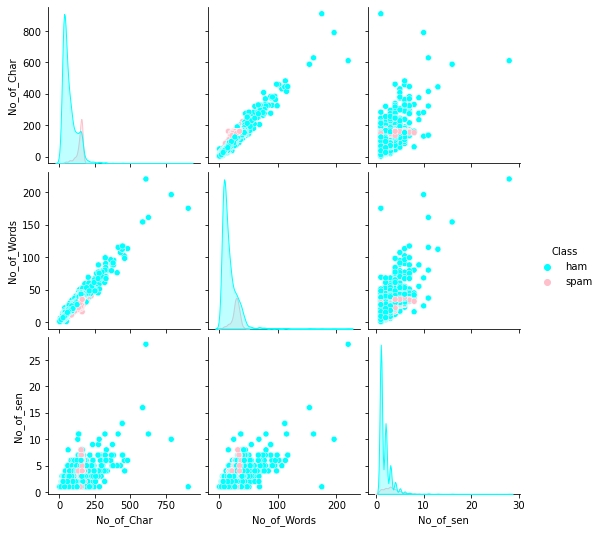

In [22]:
sns.pairplot(data=data, hue="Class",palette=cols)

Here, we can observe few outliners in the class 'Ham'. Hence, we can drop the outliners as they the same thing i.e length of the input text.

# Data Preprocessing

In [23]:
data = data[(data["No_of_Char"]<350)]
data.shape

(5550, 5)

In [24]:
#function to clean input text
def clean_data(inputText):
    text = re.sub('[^a-zA-Z]', ' ', inputText) #Replacing all non-alphabetic characters with a space
    text = text.lower() #converting input to lowercase
    text = text.split()
    text = ' '.join(text)
    return text

In [25]:
#cleaning input text
data["cleaned_text"] = data["input Text"].apply(clean_data)
data["cleaned_text"].head()

C:\Users\kondu\AppData\Local\Temp\ipykernel_5148\1539644974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cleaned_text"] = data["input Text"].apply(clean_data)


0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: cleaned_text, dtype: object

**Here, I replaced all non-alphabetic characters with a space and converted the text to lower case**

In [26]:
#Tokenization
data["Tokenized_Text"]=data.apply(lambda row: nltk.word_tokenize(row["cleaned_text"]), axis=1)
data["Tokenized_Text"].head()

C:\Users\kondu\AppData\Local\Temp\ipykernel_5148\2764974977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tokenized_Text"]=data.apply(lambda row: nltk.word_tokenize(row["cleaned_text"]), axis=1)


0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Tokenized_Text, dtype: object

**Here, I split the sentence into words(tokens) to remove stopwords in the next step.**

In [27]:
# function to Remove stopwords
def removing_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kondu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
data["No_stopword_Text"] = data["Tokenized_Text"].apply(removing_stopwords)
data["No_stopword_Text"].head()

C:\Users\kondu\AppData\Local\Temp\ipykernel_5148\2569495026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["No_stopword_Text"] = data["Tokenized_Text"].apply(removing_stopwords)


0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
Name: No_stopword_Text, dtype: object

**Stopwords give meaning to the sentence structure but do not contribute in NLP. so, I removed stopwords from the input text.**

In [30]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kondu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
data["Lemmatized_Text"] = data["No_stopword_Text"].apply(lemmatization)
data["Lemmatized_Text"].head()

C:\Users\kondu\AppData\Local\Temp\ipykernel_5148\2582914760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Lemmatized_Text"] = data["No_stopword_Text"].apply(lemmatization)


0    [go, jurong, point, crazy, available, bugis, n...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, go, usf, live, around, though]
Name: Lemmatized_Text, dtype: object

In [33]:
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [34]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [36]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [37]:
label_encoder = LabelEncoder()
data["Class"] = label_encoder.fit_transform(data["Class"])

C:\Users\kondu\AppData\Local\Temp\ipykernel_5148\1711342699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Class"] = label_encoder.fit_transform(data["Class"])


# Data Visualization After Preprocessing

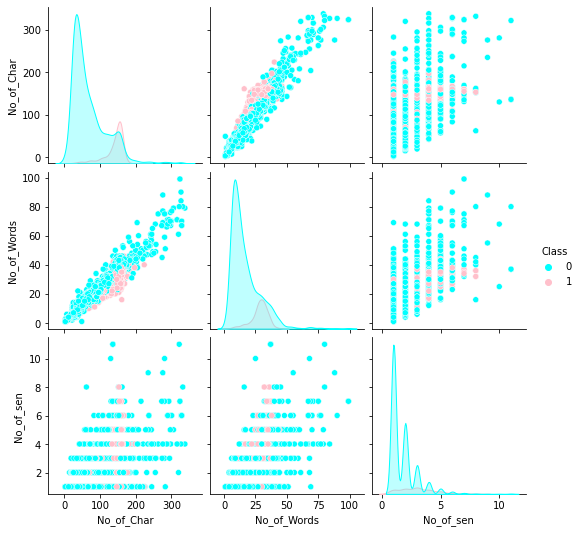

In [38]:
sns.pairplot(data=data, hue="Class",palette=cols)

# Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

In [40]:
# Splitting the testing and training datasets
y = data["Class"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

**Multinomial Naive Bayes**

In [42]:
Multinomia = MultinomialNB()
Multinomia.fit(X_train, y_train)
Multinomia_score = cross_val_score(Multinomia, X_train,y_train,scoring="accuracy", cv=10)
Multinomia_score

array([0.96915167, 0.96143959, 0.96401028, 0.96915167, 0.9562982 ,
       0.97680412, 0.95876289, 0.93814433, 0.96391753, 0.95876289])

In [43]:
Multinomia_score.mean()

0.9616443166459068

In [44]:
Multinomia_pred_train = Multinomia.predict(X_train)
Multinomia_pred_test = Multinomia.predict(X_test)
Multinomia_pred = metrics.precision_score(y_test, Multinomia_pred_test)
Multinomia_pred

1.0

In [45]:
Multinomia_recal = metrics.recall_score(y_test, Multinomia_pred_test)
Multinomia_recal

0.7296137339055794

In [46]:
Multinomia_f1_s = metrics.f1_score(y_test, Multinomia_pred_test)
Multinomia_f1_s

0.8436724565756824

In [47]:
Multinomia_train_accuracy = Multinomia.score(X_train,y_train)
Multinomia_train_accuracy

0.9745173745173745

In [48]:
Multinomia_test_accuracy = Multinomia.score(X_test,y_test)
Multinomia_test_accuracy

0.9621621621621622

In [49]:
precision.append(Multinomia_pred)
recall.append(Multinomia_recal)
f1_score.append(Multinomia_f1_s)
trainset_accuracy.append(Multinomia_train_accuracy)
testset_accuracy.append(Multinomia_test_accuracy)

**KNN**

In [50]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
KNC_score = cross_val_score(KNC, X_train,y_train,scoring="accuracy", cv=10)
KNC_score

array([0.89974293, 0.90488432, 0.91002571, 0.9125964 , 0.89974293,
       0.90979381, 0.90463918, 0.89690722, 0.92010309, 0.92525773])

In [51]:
KNC_score.mean()

0.9083693318845573

In [52]:
KNC_pred_train = KNC.predict(X_train)
KNC_pred_test = KNC.predict(X_test)
KNC_pred = metrics.precision_score(y_test, KNC_pred_test)
KNC_pred

1.0

In [53]:
KNC_recal = metrics.recall_score(y_test, KNC_pred_test)
KNC_recal

0.3218884120171674

In [54]:
KNC_f1_s = metrics.f1_score(y_test, KNC_pred_test)
KNC_f1_s

0.487012987012987

In [55]:
KNC_train_accuracy = KNC.score(X_train,y_train)
KNC_train_accuracy

0.923037323037323

In [56]:
KNC_test_accuracy = KNC.score(X_test,y_test)
KNC_test_accuracy

0.9051051051051051

In [57]:
precision.append(KNC_pred)
recall.append(KNC_recal)
f1_score.append(KNC_f1_s)
trainset_accuracy.append(KNC_train_accuracy)
testset_accuracy.append(KNC_test_accuracy)

**SVM**

In [ ]:
SVM = SVC(probability=True)
SVM.fit(X_train, y_train)

In [ ]:
SVM_score = cross_val_score(SVM, X_train,y_train,scoring="accuracy", cv=5)
SVM_score

In [60]:
SVM_score.mean()

0.9688545688545688

In [61]:
SVM_pred_train = SVM.predict(X_train)
SVM_pred_test = SVM.predict(X_test)
SVM_pred = metrics.precision_score(y_test, SVM_pred_test)
SVM_pred

0.9947643979057592

In [62]:
SVM_recal = metrics.recall_score(y_test, SVM_pred_test)
SVM_recal

0.8154506437768241

In [63]:
SVM_f1_s = metrics.f1_score(y_test, SVM_pred_test)
SVM_f1_s

0.8962264150943396

In [64]:
SVM_train_accuracy = SVM.score(X_train,y_train)
SVM_train_accuracy

0.9979407979407979

In [65]:
SVM_test_accuracy = SVM.score(X_test,y_test)
SVM_test_accuracy

0.9735735735735735

In [66]:
precision.append(SVM_pred)
recall.append(SVM_recal)
f1_score.append(SVM_f1_s)
trainset_accuracy.append(SVM_train_accuracy)
testset_accuracy.append(SVM_test_accuracy)

**Random Forest**

In [67]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_score = cross_val_score(RFC, X_train,y_train,scoring="accuracy", cv=5)
RFC_score

array([0.96782497, 0.97297297, 0.97554698, 0.96782497, 0.97297297])

In [68]:
RFC_score.mean()

0.9714285714285715

In [69]:
RFC_pred_train = RFC.predict(X_train)
RFC_pred_test = RFC.predict(X_test)
RFC_pred = metrics.precision_score(y_test, RFC_pred_test)
RFC_pred

1.0

In [70]:
RFC_recal = metrics.recall_score(y_test, RFC_pred_test)
RFC_recal

0.8454935622317596

In [71]:
RFC_f1_s = metrics.f1_score(y_test, RFC_pred_test)
RFC_f1_s

0.9162790697674419

In [72]:
RFC_train_accuracy = RFC.score(X_train,y_train)
RFC_train_accuracy

1.0

In [73]:
RFC_test_accuracy = RFC.score(X_test,y_test)
RFC_test_accuracy

0.9783783783783784

In [74]:
precision.append(RFC_pred)
recall.append(RFC_recal)
f1_score.append(RFC_f1_s)
trainset_accuracy.append(RFC_train_accuracy)
testset_accuracy.append(RFC_test_accuracy)

# Confusion Matrix

In [75]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["#00FFFF","#FFC0CB"])

**Confusion Matrix of Multinomial Naive Bayes Model**

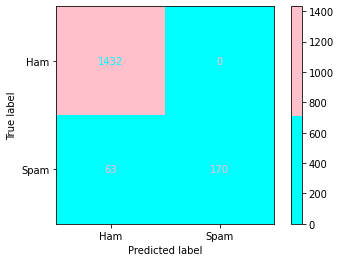

In [76]:
Multinomia_confusion_matrix = metrics.confusion_matrix(y_test, Multinomia_pred_test)
Multinomia_display = ConfusionMatrixDisplay(Multinomia_confusion_matrix,display_labels=["Ham","Spam"])
Multinomia_display.plot(cmap=cmap2)
plt.show()

**Confusion Matrix of KNN Model**

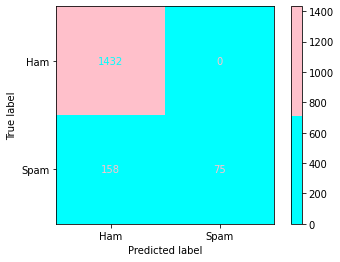

In [77]:
KNC_confusion_matrix = metrics.confusion_matrix(y_test, KNC_pred_test)
KNC_display = ConfusionMatrixDisplay(KNC_confusion_matrix,display_labels=["Ham","Spam"])
KNC_display.plot(cmap=cmap2)
plt.show()

**Confusion Matrix of SVM Model**

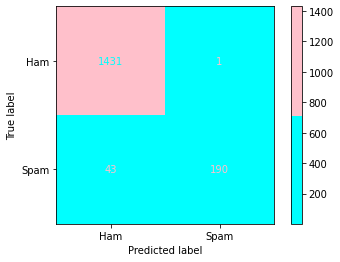

In [78]:
SVM_confusion_matrix = metrics.confusion_matrix(y_test, SVM_pred_test)
SVM_display = ConfusionMatrixDisplay(SVM_confusion_matrix,display_labels=["Ham","Spam"])
SVM_display.plot(cmap=cmap2)
plt.show()

**Confusion Matrix of Random Forest Model**

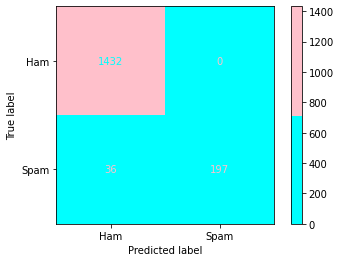

In [79]:
RFC_confusion_matrix = metrics.confusion_matrix(y_test, RFC_pred_test)
RFC_display = ConfusionMatrixDisplay(RFC_confusion_matrix,display_labels=["Ham","Spam"])
RFC_display.plot(cmap=cmap2)
plt.show()

# EVALUATING MODELS

In [80]:
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
Results = pd.DataFrame(data, index =["NaiveBayes", "KNeighbours","SVC","RFC"])

In [81]:
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.729614,0.843672,0.962162,0.974517
KNeighbours,1.000000,0.321888,0.487013,0.905105,0.923037
SVC,0.994764,0.815451,0.896226,0.973574,0.997941
RFC,1.000000,0.845494,0.916279,0.978378,1.000000


# ROC Curves

ROC Curve for Naive Bayes:


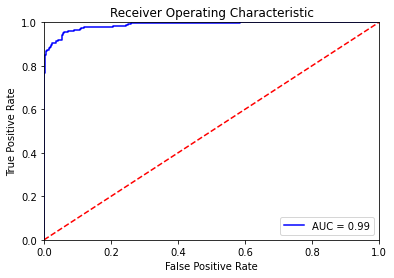

In [83]:
Multinomia_pred = Multinomia.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, Multinomia_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for Naive Bayes:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for KNeibhours Classifier:


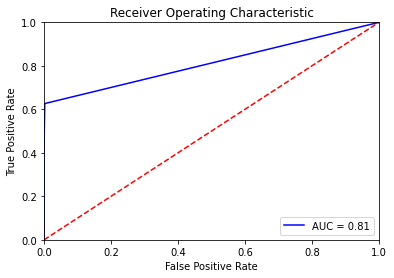

In [84]:
KNC_pred = KNC.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, KNC_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for KNeibhours Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for SVM Classifier:


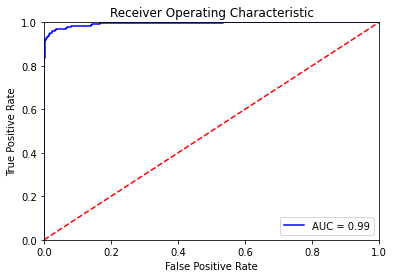

In [85]:
SVM_pred = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, SVM_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for SVM Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for RFC Classifier:


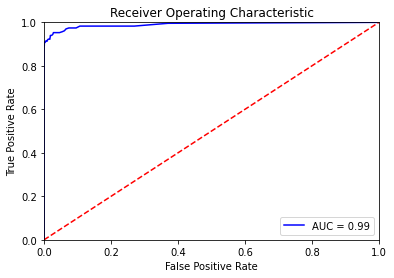

In [86]:
RFC_pred = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, RFC_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for RFC Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()